In [1]:
import sys
sys.path.append("../")

In [2]:
import pickle
import random
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import torch
from plotly.subplots import make_subplots

from simulator.simulator import Sim
from strategies.rl import (
    A2CNetwork,
    Policy,
    RLStrategy,
    A2C,
    ComputeValueTargets,
)
from utils.get_info import get_pnl, get_volumes
from utils.load_data import load_md_from_csv
from datetime import datetime
from tqdm import tqdm


In [3]:
def preprocess_data(csv_books, csv_trades, num_rows=-1):
    return load_md_from_csv(csv_books, csv_trades, num_rows=num_rows)


In [5]:
dataset = preprocess_data(
    "../data/books.csv", "../data/trades.csv"
)

print("TOTAL DATA UPDATES: %d" % len(dataset))

TOTAL DATA UPDATES: 1797585


In [7]:
dataset[0]

MdUpdate(exchange_ts=1673222400.909, receive_ts=1673222400.909, orderbook=None, trade=AnonTrade(exchange_ts=1673222400.909, receive_ts=1673222400.909, side='BID', size=0.00011667, price=17127.5))

In [9]:
import matplotlib.pyplot as plt

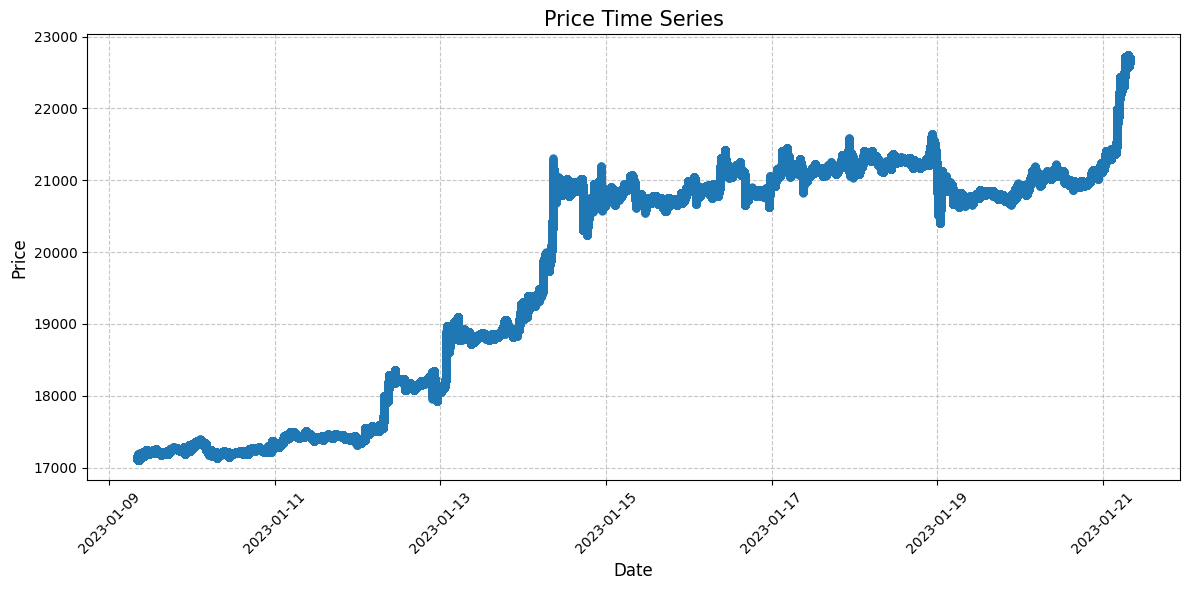

In [10]:
timestamps = [md.trade.receive_ts for md in dataset if md.trade is not None]
prices = [md.trade.price for md in dataset if md.trade is not None]

# 将时间戳转换为可读的日期时间
dates = [datetime.fromtimestamp(ts) for ts in timestamps]

# 创建DataFrame以便更好地处理
df = pd.DataFrame({
    'Date': dates,
    'Price': prices
})

# 设置图形大小和样式
plt.figure(figsize=(12, 6))

# 绘制价格时间序列
plt.plot(df['Date'], df['Price'], marker='o', linestyle='-', linewidth=2, markersize=5)

# 设置标题和标签
plt.title('Price Time Series', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)

# 旋转x轴标签以提高可读性
plt.xticks(rotation=45)

# 自动调整布局
plt.tight_layout()

# 显示网格线
plt.grid(True, linestyle='--', alpha=0.7)

# 显示图形
plt.show()

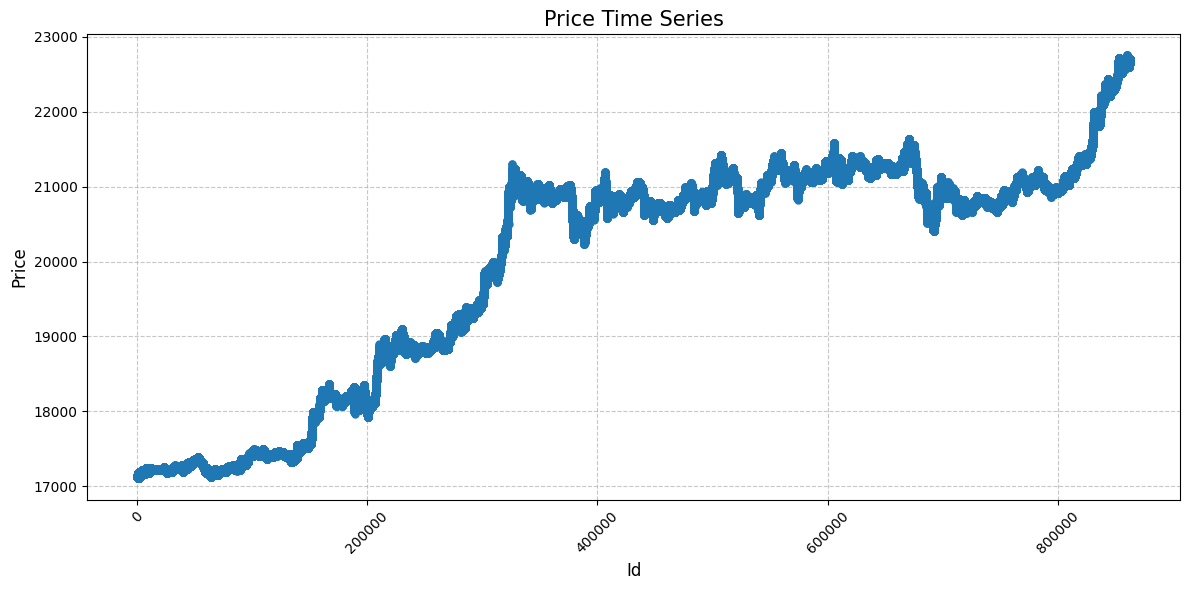

In [16]:
indexs = range(len([md for md in dataset if md.trade is not None]))
prices = [md.trade.price for md in dataset if md.trade is not None]

# 创建DataFrame以便更好地处理
df = pd.DataFrame({
    'Id': indexs,
    'Price': prices
})

# 设置图形大小和样式
plt.figure(figsize=(12, 6))

# 绘制价格时间序列
plt.plot(df['Id'], df['Price'], marker='o', linestyle='-', linewidth=2, markersize=5)

# 设置标题和标签
plt.title('Price Time Series', fontsize=15)
plt.xlabel('Id', fontsize=12)
plt.ylabel('Price', fontsize=12)

# 旋转x轴标签以提高可读性
plt.xticks(rotation=45)

# 自动调整布局
plt.tight_layout()

# 显示网格线
plt.grid(True, linestyle='--', alpha=0.7)

# 显示图形
plt.show()

In [69]:
indexs = range(len([md for md in dataset if md.trade is not None][370_000:390_000]))
prices = [md.trade.price for md in dataset if md.trade is not None][370_000:390_000]
print(dates[370_000], dates[390_000])

2023-01-14 15:31:13.110000 2023-01-14 18:40:09.836000


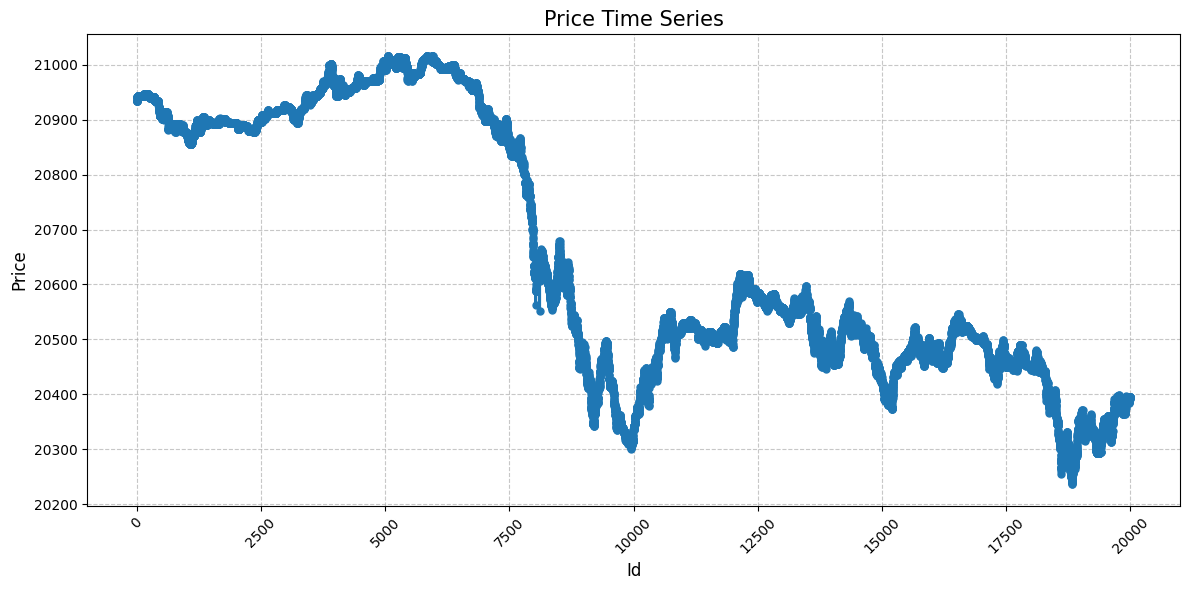

In [70]:


# 创建DataFrame以便更好地处理
df = pd.DataFrame({
    'Id': indexs,
    'Price': prices
})

# 设置图形大小和样式
plt.figure(figsize=(12, 6))

# 绘制价格时间序列
plt.plot(df['Id'], df['Price'], marker='o', linestyle='-', linewidth=2, markersize=5)

# 设置标题和标签
plt.title('Price Time Series', fontsize=15)
plt.xlabel('Id', fontsize=12)
plt.ylabel('Price', fontsize=12)

# 旋转x轴标签以提高可读性
plt.xticks(rotation=45)

# 自动调整布局
plt.tight_layout()

# 显示网格线
plt.grid(True, linestyle='--', alpha=0.7)

# 显示图形
plt.show()